<a href="https://colab.research.google.com/github/kojikoji19780303/Cry_baby/blob/master/DAY14_%E4%BD%8F%E5%AE%85%E4%BE%A1%E6%A0%BC%E3%81%AE%E4%BA%88%E6%B8%AC_%E8%AA%B2%E9%A1%8C%E6%8F%90%E5%87%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ライブラリのインポート
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
cd/content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
# データセットの準備　CSV読み込み
df = pd.read_csv("train.csv")

【問題1】練習のために特徴量の選択

データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

In [4]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
# 説明変数と目的変数を抜きだす
df_x = df.loc[:,["GrLivArea","YearBuilt","SalePrice"]]
df_x.head(2)

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500


【問題2】線形回帰による推定と評価


In [6]:
# sklearnのから各種モデルをimportする
# データの分割
from sklearn.model_selection import train_test_split

# 線形回帰
from sklearn.linear_model import LinearRegression

# 平均二乗誤差。真の値と予測の値の差を二乗した平均を表します。小さいほうが良い。
# 外れ値の影響を大きく評価
# 単位が目的変数の二乗
from sklearn.metrics import mean_squared_error

In [7]:
# データを分割
X_train, X_test, y_train, y_test = train_test_split(df_x.iloc[:, :-1], df_x.loc[:, "SalePrice"], test_size=0.25, random_state=42)

In [8]:
X_train.shape

(1095, 2)

In [9]:
X_test.shape

(365, 2)

In [10]:
y_train.shape

(1095,)

In [11]:
y_test.shape

(365,)

In [12]:
# インスタンス作成
linear = LinearRegression()

In [13]:
# トレーニングデータに学習させる
linear.fit(X_train, y_train)

LinearRegression()

In [14]:
# できたモデルでテスト（推定）
y_pred = linear.predict(X_test)
y_pred

array([130445.81129484, 306448.48211546,  88741.8324304 , 168496.12883044,
       227800.17562669,  99569.77660678, 186783.75135889, 182056.44293199,
        97457.76006969, 151960.15487048, 131192.06213303, 117840.59883308,
        84836.16656948, 216795.82827786, 226861.55984128, 114354.20681418,
       233851.35381306, 133362.46046392,  79874.70207186, 210577.06633379,
       191870.90367478, 226090.42299764, 212412.50678112, 110884.40546558,
       201927.81582345, 174203.21527073, 201986.40724909,  98966.53796861,
       215765.02046252, 202036.70333958,  89328.69003012, 262849.94729844,
       298537.18710817, 112359.4779443 , 228219.23983687, 138826.88586649,
       193790.24081689, 251971.28776788, 295988.88679508, 105906.0358499 ,
       109778.31073838, 259246.16279641, 128015.21791264, 267761.22052149,
       120958.43236415, 148080.42317423, 117119.86289586, 123196.13671951,
       291177.99612118, 167205.33559564, 109342.34141015, 191233.74998457,
       165931.23784706, 3

In [15]:
# 平均二乗誤差（標準偏差、ばらつき、MSE）を求める
mean_squared_error(y_test, y_pred)

2314465092.732015

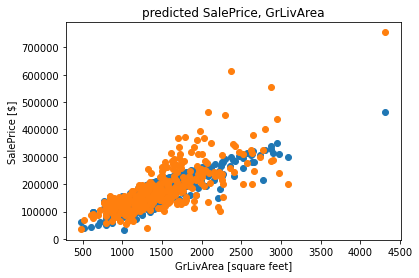

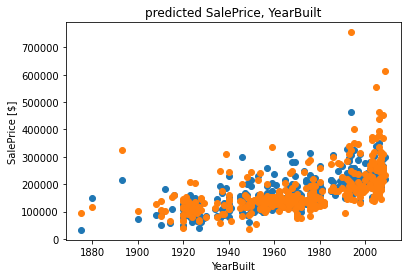

In [16]:
# 可視化
plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["GrLivArea"], y_pred)
plt.scatter(X_test["GrLivArea"], y_test)
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["YearBuilt"], y_pred)
plt.scatter(X_test["YearBuilt"], y_test)
plt.show()

【問題3】手法の比較

線形回帰

SVM

決定木

ランダムフォレスト


In [17]:
# sklearnのから各種モデルをimportする
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [18]:
# importしたモデルをインスタンス化
linear_reg = LinearRegression()
svr = SVR()
tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()

In [19]:
# 可視化
models = [linear_reg, svr, tree, random_forest]
model_names = ["Linear Regression", "SVM", "Decision Tree", "Random Forest"]
mse_list = []

In [20]:
for model, model_name in zip(models, model_names):  #zip関数
    print(model_name)  #モデル名を出力
    model.fit(X_train, y_train)  #モデルの学習
    y_pred = model.predict(X_test) #推論
    mse_list.append(mean_squared_error(y_test, y_pred))
    print("MSE : {}".format(mse_list[-1]))


Linear Regression
MSE : 2314465092.732015
SVM
MSE : 7171025750.700425
Decision Tree
MSE : 2325965444.44688
Random Forest
MSE : 1593891323.232432


In [21]:
# 
metrics = pd.DataFrame([mse_list], columns=model_names)
display(metrics)

,Linear Regression,SVM,Decision Tree,Random Forest
0,2.314465e+09,7.171026e+09,2.325965e+09,1.593891e+09


In [22]:
import pandas as pd

【問題4】（アドバンス課題）他の特徴量も使用しての学習

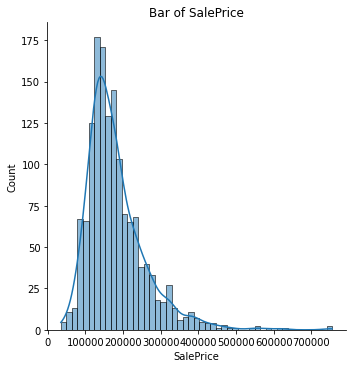

In [23]:
# SalePriceの分布をみる。
sns.displot(data = df_x, x = 'SalePrice',kde=True)
plt.title("Bar of SalePrice")
plt.show()
# SalesPriceの一番多いのはUSD150,000辺り。

In [24]:
# 5つ以上欠損値がある特徴量（列）は削除する。
missing = df.isnull().sum(axis=0) #各列の欠損値を合計
missing

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [25]:
 #5つ以上欠損値がある列を抽出
missing5 = missing[missing>=5]
missing5

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [26]:
 #対象列を削除
df.drop(missing5.index,axis=1, inplace=True)

In [27]:
# 5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。
df.dropna(how='any',inplace=True)

In [28]:
 #データを見ると１行、18列を削除している
df.shape

(1459, 63)

In [29]:
df.head(2)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


In [30]:
df.corr()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.010589,-0.033170,-0.027553,0.013167,-0.013945,-0.023158,-0.004001,-0.005668,-0.007508,-0.013815,0.011627,0.004885,-0.044139,0.008524,0.003158,-0.019917,0.004758,0.005494,0.037577,0.003177,0.026948,-0.018788,0.016254,0.018010,-0.029716,0.000267,0.003272,-0.046550,0.001617,0.057163,-0.006155,0.021708,0.000566,-0.021756
MSSubClass,0.010589,1.000000,-0.139766,0.032936,-0.059134,0.027435,0.040199,-0.069501,-0.065549,-0.140627,-0.238160,-0.251484,0.307713,0.046524,0.074949,0.003799,-0.002243,0.131354,0.177004,-0.023502,0.281833,0.040274,-0.045232,-0.040232,-0.098558,-0.012598,-0.005838,-0.011904,-0.043786,-0.025932,0.008309,-0.007651,-0.013404,-0.021461,-0.084230
LotArea,-0.033170,-0.139766,1.000000,0.105786,-0.005665,0.014296,0.013852,0.214121,0.111158,-0.002641,0.260962,0.299533,0.051030,0.004773,0.263109,0.158147,0.048034,0.126100,0.014333,0.119700,-0.017796,0.190037,0.271398,0.154893,0.180392,0.171701,0.084751,-0.018360,0.020417,0.043147,0.077669,0.038063,0.001179,-0.014254,0.263837
OverallQual,-0.027553,0.032936,0.105786,1.000000,-0.092243,0.573334,0.551605,0.239265,-0.059291,0.308018,0.537523,0.475933,0.295969,-0.030502,0.593021,0.110700,-0.040291,0.551267,0.274328,0.101789,-0.184040,0.427720,0.396455,0.600991,0.561980,0.239000,0.308554,-0.114162,0.030314,0.064755,0.065143,-0.031461,0.070570,-0.027277,0.791069
OverallCond,0.013167,-0.059134,-0.005665,-0.092243,1.000000,-0.375780,0.074158,-0.046595,0.040132,-0.137008,-0.171796,-0.144646,0.029187,0.025454,-0.079777,-0.055250,0.117749,-0.193929,-0.060371,0.013039,-0.087085,-0.057485,-0.024167,-0.185670,-0.151662,-0.003318,-0.032847,0.070238,0.025465,0.054721,-0.002009,0.068752,-0.003685,0.044003,-0.077924
YearBuilt,-0.013945,0.027435,0.014296,0.573334,-0.375780,1.000000,0.592512,0.250465,-0.048903,0.149444,0.393159,0.283056,0.009784,-0.183774,0.199286,0.188374,-0.037990,0.467960,0.241923,-0.070813,-0.174715,0.095401,0.148580,0.537866,0.479460,0.224946,0.189359,-0.387177,0.031461,-0.050175,0.005006,-0.034330,0.012791,-0.013733,0.523273
YearRemodAdd,-0.023158,0.040199,0.013852,0.551605,0.074158,0.592512,1.000000,0.129259,-0.067575,0.181520,0.292546,0.241344,0.139607,-0.062356,0.287677,0.120148,-0.012165,0.438733,0.182595,-0.040718,-0.149503,0.191603,0.113360,0.420573,0.372012,0.205773,0.226944,-0.193740,0.045389,-0.038558,0.005882,-0.010226,0.021860,0.035656,0.507430
BsmtFinSF1,-0.004001,-0.069501,0.214121,0.239265,-0.046595,0.250465,0.129259,1.000000,-0.050328,-0.495718,0.521963,0.445473,-0.136697,-0.064604,0.208088,0.649025,0.067281,0.059102,0.005085,-0.107281,-0.081175,0.044529,0.259541,0.224342,0.296851,0.204403,0.111346,-0.102581,0.026382,0.061862,0.140491,0.003514,-0.016060,0.014456,0.386436
BsmtFinSF2,-0.005668,-0.065549,0.111158,-0.059291,0.040132,-0.048903,-0.067575,-0.050328,1.000000,-0.209395,0.104593,0.096948,-0.099146,0.014784,-0.009686,0.158557,0.070904,-0.076306,-0.031922,-0.015696,-0.040795,-0.035170,0.046748,-0.038204,-0.018295,0.067909,0.002954,0.036475,-0.030017,0.088823,0.041697,0.004923,-0.015309,0.031734,-0.011412
BsmtUnfSF,-0.007508,-0.140627,-0.002641,0.308018,-0.137008,0.149444,0.181520,-0.495718,-0.209395,1.000000,0.415283,0.317827,0.004661,0.028134,0.240210,-0.423256,-0.095880,0.289189,-0.040792,0.166701,0.030028,0.250754,0.051323,0.214284,0.183224,-0.005304,0.128835,-0.002640,0.020732,-0.012657,-0.035114,-0.023863,0.034754,-0.041221,0.214446


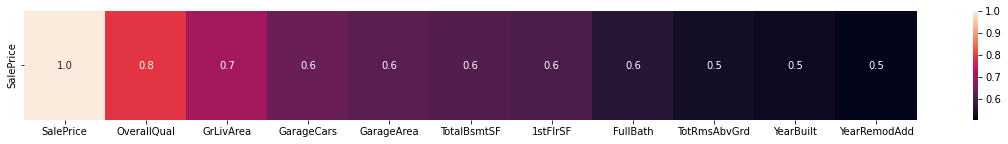

In [31]:
#目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
corrmat = df.corr()
corrmat10 = corrmat.nlargest(11, 'SalePrice')
plt.figure(figsize=(20, 2))
sns.heatmap(corrmat10[["SalePrice"]].T,annot=True,fmt="1.1f")
plt.show()

In [32]:
# 特徴量（説明変数）をX、正解（目的変数）をyに格納する。
X = df.iloc[:,[15, 37, 48,49, 29, 34, 40, 45, 17, 18]]
y = df.iloc[:,62]

In [33]:
#XとyのShapeを確認する。
print("X:{}".format(X.shape))
print("y:{}".format(y.shape))
print("")

X:(1459, 10)
y:(1459,)



In [34]:
#trains_test_splitを利用してXとyをTrain:Test=75%:25%の割合で分割する。
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75,random_state=1)

In [35]:
#分割結果を確認する。
print("X_train:{}".format(X_train.shape))
print("X_test:{}".format(X_test.shape))
print("y_train:{}".format(y_train.shape))
print("y_test:{}".format(y_test.shape))

X_train:(1094, 10)
X_test:(365, 10)
y_train:(1094,)
y_test:(365,)


In [36]:
for model, model_name in zip(models, model_names):  #zip関数
    print(model_name)  #モデル名を出力
    model.fit(X_train, y_train)  #モデルの学習
    y_pred = model.predict(X_test) #推論
    mse_list.append(mean_squared_error(y_test, y_pred))
    print("MSE : {}".format(mse_list[-1]))

Linear Regression
MSE : 1896382893.3656464
SVM
MSE : 6040099425.057786
Decision Tree
MSE : 1695814358.2253425
Random Forest
MSE : 948135768.4336354
